# Lab 2-2. Decision Tree

 ### 간단하교 효과적인 머신러닝 툴인 Scikit-learn 패키지를 사용한 Decision Tree Tutorial
*   Classification Tree, Regression Tree
*   Random Forest, Gradient Boost

[Ref.]
*   https://scikit-learn.org/stable/modules/tree.html
*   https://scikit-learn.org/stable/modules/ensemble.html






---
## Classification Tree


### Load Diabetes Dataset from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:


diabetes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/diabetes.csv')
print(diabetes.columns)
diabetes.head()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_features = [x for i,x in enumerate(diabetes.columns) if i!=8]

In [ ]:
print("dimension of diabetes data: {}".format(diabetes.shape))

dimension of diabetes data: (768, 9)


### Split and prepare the dataset

In [ ]:
train = diabetes[:650]
test = diabetes[650:]
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
x_train = np.asarray(train.drop('Outcome',1))
y_train = np.asarray(train['Outcome'])
x_test = np.asarray(test.drop('Outcome',1))
y_test = np.asarray(test['Outcome'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


KeyError: ignored

### Decision Tree

In [ ]:
from sklearn import tree 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0) # Gini by default
clf.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(clf.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf.score(x_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.703


트레이닝 셋에서의 정확도는 100%이나, 테스트셋에서의 정확도는 떨어짐. 즉, overfitting 되어 새로운 데이터에 generalize가 안된다는 뜻.

#### Visualize Tree

[Ellipsis]

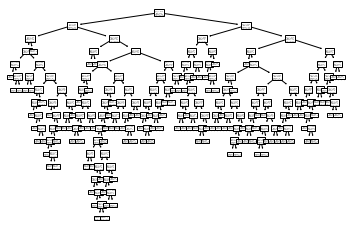

In [ ]:
tree.plot_tree(clf)
[...]

 Pre-pruning, max_depth=3 으로 설정해서 오버피팅을 방지한다. 트레이닝 셋에서의 정확도는 떨어지지만, 테스트 셋에서의 성능은 올라간다. 
 그 외에도 [post pruning with cost complexity pruning](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py)를 활용할 수 있다.

In [ ]:
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(clf.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf.score(x_test, y_test)))

Accuracy on training set: 0.783
Accuracy on test set: 0.763


[Ellipsis]

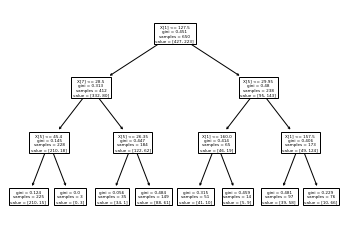

In [ ]:
tree.plot_tree(clf)
[...]


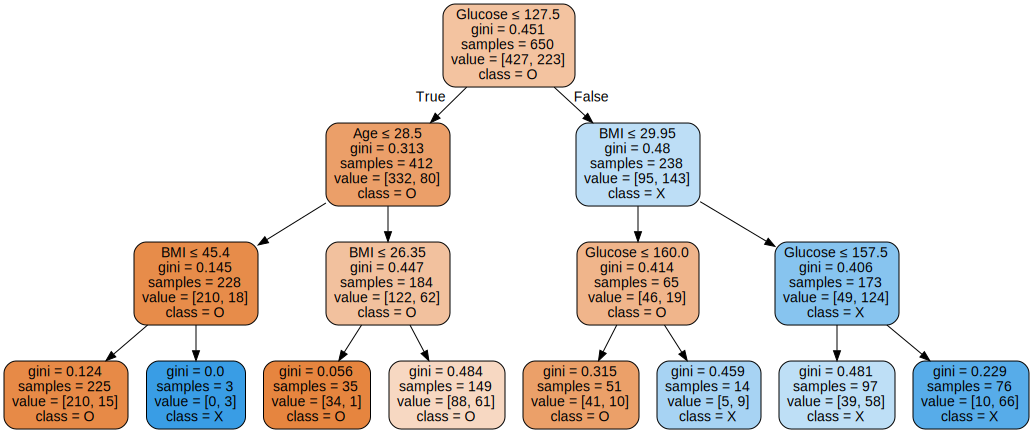

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=diabetes_features,  
                     class_names=['O','X'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

#### Feature importance in Decision trees
강의에서 다룬 Variable Importance Measure와 같음.
각각의 예측변수가 decision에 있어서 얼마나 중요한지 0과 1사이의 값으로 모두 합쳐서 1이 되도록 나타냄

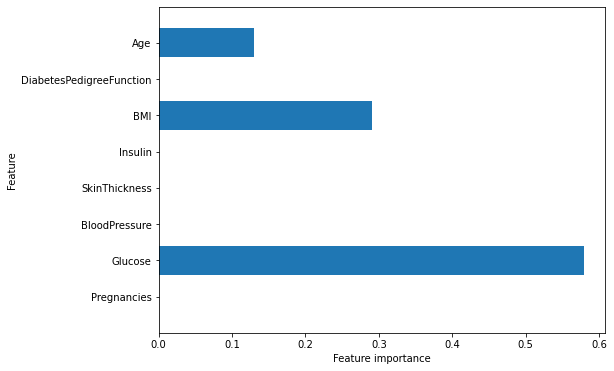

In [ ]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_diabetes(clf)

### Random Forest

diabetes dataset에 100개의 트리로 구성된 Random Forest를 적용해보자.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#n_estimators=>넘버 오브 estimator즉 추정 수! 원래 100이 디폴트
rf = RandomForestClassifier(n_estimators=100, random_state=0)
print(y_train)
rf.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(x_test, y_test)))

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

75.4%의 성능으로, Single tree 모델보다 성능이 떨어짐. 또한, Overfitting됨
따라서 max_features를 줄이고, max_depth를 준다.

In [ ]:
# max_features의 디폴트는 루트 p(전체 인풋 예측 변수의 수) 즉, 루트 8이어서 2.xxx였으나 이번에는 2로 설정
rf1 = RandomForestClassifier(max_features=2, max_depth=3, n_estimators=100, random_state=0)
rf1.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(x_test, y_test)))

Accuracy on training set: 0.792
Accuracy on test set: 0.771


#### Feature importance in Random Forest

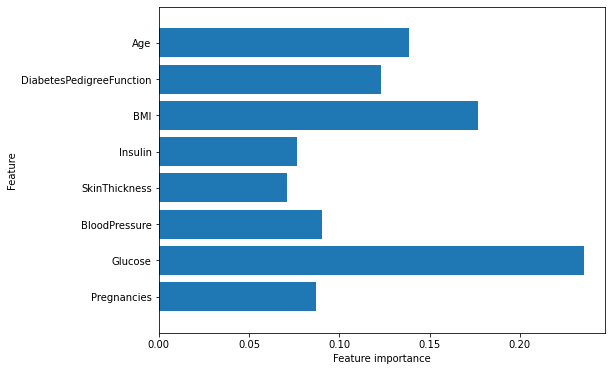

In [ ]:
# 변수가 고려되면 더 다양한 변수가 분기 조건을 잡게 되고 importance가 잡히게 되는것!
plot_feature_importances_diabetes(rf)

Single tree와 마찬가지로 글루코스와 BMI의 중요도가 높음. 반면, Random forest의 randomness 때문에 더 다양한 변수들을 고려하는걸 볼 수 있다.

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=0)
gb.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb.score(x_test, y_test)))

ValueError: ignored

overfitting을 줄이기 위해서, maximum depth로 pre-pruning을 해준다.

In [ ]:
#멕스 뎁스 줄이기!
gb1 = GradientBoostingClassifier(random_state=0, max_depth=2) # by deafult 3
gb1.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb1.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb1.score(x_test, y_test)))

Accuracy on training set: 0.855
Accuracy on test set: 0.754


In [ ]:
#이번엔 러닝레이트 줄이기!
gb2 = GradientBoostingClassifier(random_state=0, learning_rate=0.01) # by default 0.1
gb2.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb2.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb2.score(x_test, y_test)))

Accuracy on training set: 0.797
Accuracy on test set: 0.754


두 방법 모두 모델의 complexity를 줄이면서 training set의 성능이 test set과 가까워졌다. 그러나 test set에서의 성능이 딱히 개선되지 않았다.

#### Feature importance in Gradient Boosting

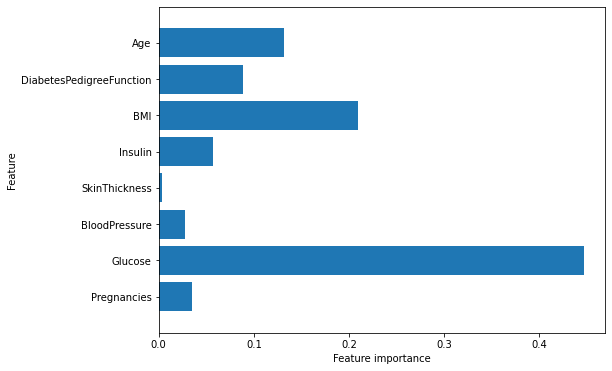

In [ ]:
plot_feature_importances_diabetes(gb1)

Random forest의 feature importance와 비슷함.



---
## Regression Tree



### Simple regression tree using synthetic data

In [ ]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [ ]:
# Create a random dataset
#synthetic data =>  우리가 랜덤으로 셈플 데이터를 만드는것!
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0) # 0~5 사이의 80개의 숫자 정렬!
y = np.sin(X).ravel()# ravel()을 통해 1차원으로 펴지게 됨!
y[::5] += 3 * (0.5 - rng.rand(16))


In [ ]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)


DecisionTreeRegressor(max_depth=5)

In [ ]:

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)


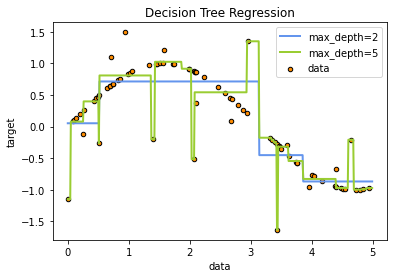

In [ ]:
# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()
# max_depth가 높으면 오버피팅이 많이 잡힘(특이한 값들) 따라서 차라리 이런경우는
# max_depth 를 줄여서 오버피팅을 줄이는 것이 나음!

### Regression Tree with Tada ETA data



*   ATA: Actual Time of Arrival(실제 도착시간)
*   ETA: Expected Time of Arrival(예상 도착시간)
         타다를 호출을 했을때 예상 시간!
*   api_eta: 앱 API에서 예측된 ETA



In [ ]:
tada_eta = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/data/tada_eta.xlsx')
print(tada_eta.columns)
tada_eta.head()

Index(['ATA', 'id', 'api_eta', 'created_at_kst', 'month', 'pickup_lng',
       'pickup_lat', 'pickup_gu', 'driver_id', 'driver_lng', 'driver_lat',
       'hour'],
      dtype='object')


,ATA,id,api_eta,created_at_kst,month,pickup_lng,pickup_lat,pickup_gu,driver_id,driver_lng,driver_lat,hour
0,10.60,R4L9FL6NVEL4D0,5.65,2019-12-01T00:55:09,12,127.091399,37.624545,노원구,DST52944,127.069978,37.616472,0
1,9.20,R3A7JBY7CS6TPD,8.60,2019-12-01T00:09:39,12,127.023351,37.625564,강북구,DPC72995,127.026479,37.604711,0
2,10.85,R2BIUY1TDK14XE,10.53,2019-12-15T00:18:42,12,126.881154,37.481641,금천구,DPP94923,126.906225,37.452167,0
3,5.52,R31PU5GNHSGU6C,1.92,2019-07-31T00:24:11,7,126.988375,37.567897,중구,DCT73585,126.991170,37.566416,0
4,8.60,R41WR6N1VT42DJ,7.10,2019-07-05T00:40:34,7,126.988684,37.566716,중구,DPJ86237,127.006860,37.571164,0


In [ ]:
tada_eta['distance'] = ((tada_eta['pickup_lat']-tada_eta['driver_lat'])**2 + (tada_eta['pickup_lng']-tada_eta['driver_lng'])**2)*100000
tada_eta = tada_eta.drop(['id', 'created_at_kst', 'driver_id', 'pickup_lng', 'pickup_lat', 'driver_lng','driver_lat','pickup_gu'],1)
tada_eta.head()
# 지역구 제거, 거리열로 새로 조합, 사용자 id등 필요 없는 변수는 drop!
# sklearn의 tree는 범주 데이터는 다루지 못함. 이 경우에 one-hot encoding은 비효율적. 구 데이터도 활용하고 싶다면 h2o 참고

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,ATA,api_eta,month,hour,distance
0,10.60,5.65,12,0,52.400202
1,9.20,8.60,12,0,44.465889
2,10.85,10.53,12,0,149.731535
3,5.52,1.92,7,0,1.000535
4,8.60,7.10,7,0,35.014797


In [ ]:
#hour 가 정렬이 되어있는데 이것을 섞어줌!
# 전체 셈플을 전체 개수(frac=1) 으로 셈플!
tada_eta = tada_eta.sample(frac=1).reset_index(drop=True)
tada_eta.head()

,ATA,api_eta,month,hour,distance
0,11.02,9.87,7,22,54.959351
1,13.92,9.75,7,16,43.927144
2,10.08,7.22,12,20,37.523487
3,15.97,12.03,12,8,84.845514
4,8.38,7.57,12,23,40.359665


In [ ]:
tada_eta.shape

(13916, 5)

In [ ]:
train = tada_eta[:12000]
test = tada_eta[12000:]

In [ ]:
#인풋 변수와 타켓변수 drop!
x_train = np.asarray(train.drop('ATA',1))
y_train = np.asarray(train['ATA'])
x_test = np.asarray(test.drop('ATA',1))
y_test = np.asarray(test['ATA'])
print(x_train)
print(y_train)
eta_features = [x for i,x in enumerate(tada_eta.columns) if i!=0]

[[ 9.87        7.         22.         54.95935066]
 [ 9.75        7.         16.         43.92714358]
 [ 7.22       12.         20.         37.52348735]
 ...
 [ 0.77        7.          8.          0.35147755]
 [ 5.97        7.         23.         24.62207793]
 [ 5.18        7.         18.          3.50127639]]
[11.02 13.92 10.08 ...  2.67  9.55  5.37]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [ ]:
eta_features #리스트로 인풋 피쳐들의이름 저장

['api_eta', 'month', 'hour', 'distance']

#### Gradient Boosting 사용

In [ ]:
# 파라미터 지정
#ls = square err
params = {'n_estimators': 100,
          'max_depth': 3,
           'min_samples_leaf': 5,
          'learning_rate': 0.05,
          'loss': 'ls'} # 'squared_error'와 같음

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import ensemble

In [ ]:
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
#{'learning_rate': 0.05, 'loss': 'ls', 'max_depth': 2, 'min_samples_leaf': 20, 'n_estimators': 200}
# Hyperparameter 조합 정의
param_grids= {
    'n_estimators':[100,200,300],
    'max_depth':[2,3,4,5],
    'min_samples_leaf':[1,20,100],
    'learning_rate':[0.01,0.02,0.05],
    'loss':['ls']
}
# grid search 모델 정의, 학습 및 model selection
grid_search = GridSearchCV(estimator=ensemble.GradientBoostingRegressor(),
                           param_grid=param_grids,
                           cv=3, 
                           n_jobs=-1, 
                           scoring='neg_mean_squared_error', 
                           verbose=2)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
reg = ensemble.GradientBoostingRegressor(**grid_search.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


KeyboardInterrupt: ignored

In [ ]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(x_train, y_train)

mse = mean_squared_error(y_test, reg.predict(x_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The initial error of API ETA on test set: {:.4f}".format(mean_squared_error(y_test, x_test[:,0]) ))

mae = mean_absolute_error(y_test, reg.predict(x_test))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
print("The initial error of API ETA on test set: {:.4f}".format(mean_absolute_error(y_test, x_test[:,0]) ))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


The mean squared error (MSE) on test set: 8.3547
The initial error of API ETA on test set: 14.0687
The mean absolute error (MAE) on test set: 2.1005
The initial error of API ETA on test set: 2.7083


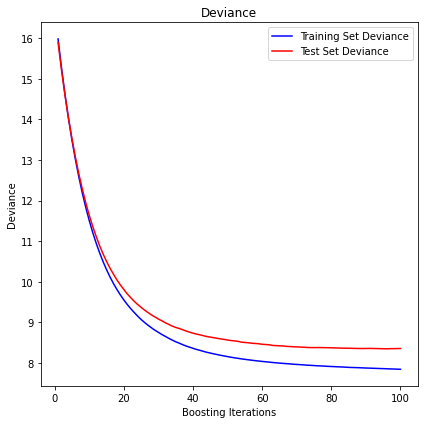

In [ ]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
# 학습의 수가 적지 않았느지 확인하기 위해  reg.staged_predict 사용
#횟수별로 체크!
for i, y_pred in enumerate(reg.staged_predict(x_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

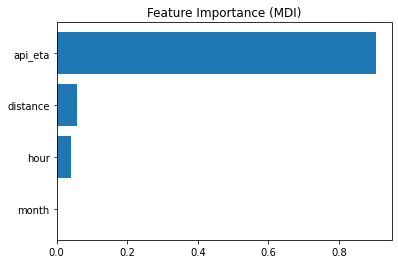

In [ ]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure()
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(eta_features)[sorted_idx])
plt.title('Feature Importance (MDI)')
plt.show()

### HW 2: Make a better model for TADA ETA data
tree parameter를 바꾸거나, 아예 다른 알고리즘을 사용해도 됨.
트레이닝 데이터도 조작해도 되지만, 테스트셋은 조작 금지 

```
test = tada_eta[12000:]
```



[Ref.]
*   https://scikit-learn.org/stable/modules/tree.html
*   https://scikit-learn.org/stable/modules/ensemble.html


In [ ]:
train = tada_eta[:12000]
test = tada_eta[12000:]

x_train = np.asarray(train.drop('ATA',1))
y_train = np.asarray(train['ATA'])
x_test = np.asarray(test.drop('ATA',1))
y_test = np.asarray(test['ATA'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import ensemble

In [ ]:
params = {'n_estimators': 100,
          'max_depth': 3,
           'min_samples_leaf': 1,
          'learning_rate': 0.1,
          'loss': 'ls'} # 'squared_error'와 같음

In [ ]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(x_train, y_train)

mse = mean_squared_error(y_test, reg.predict(x_test))
print("The mean squared error (MSE) on test set: {:.6f}".format(mse))
print("The initial error of API ETA on test set: {:.6f}".format(mean_squared_error(y_test, x_test[:,0]) ))

mae = mean_absolute_error(y_test, reg.predict(x_test))
print("The mean absolute error (MAE) on test set: {:.6f}".format(mae))
print("The initial error of API ETA on test set: {:.6f}".format(mean_absolute_error(y_test, x_test[:,0]) ))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


The mean squared error (MSE) on test set: 8.375251
The initial error of API ETA on test set: 14.068698
The mean absolute error (MAE) on test set: 2.100122
The initial error of API ETA on test set: 2.708293


In [ ]:
#max_depth를 1~20까지 조절
# max_depth 는 트리의 최대 깊이를 의미
#깊이가 너무 깊으면 과적합 우려
best_max_depth_mse = 13.5678
best_max_depth_mae = 2.6694
max_depth_mse = 0
max_depth_mae = 0
for i in range(1,21):

    params = {'n_estimators': 100,
          'max_depth': i,
          'min_samples_leaf': 1,
          'min_samples_split': 2,
          'learning_rate': 0.1,
          'loss': 'ls'} # 'squared_error'와 같음
    reg = ensemble.GradientBoostingRegressor(**params)
    reg.fit(x_train, y_train);
    mse = mean_squared_error(y_test, reg.predict(x_test))
    mae = mean_absolute_error(y_test, reg.predict(x_test))
    if mse < best_max_depth_mse:
        best_max_depth_mse = mse
        max_depth_mse = i
    if mae < best_max_depth_mae:
        best_max_depth_mae = mae
        max_depth_mae = i


print("The mean squared error (MSE) on test set: {:.6f}".format(best_max_depth_mse))
print("The mean absolute error (MAE) on test set: {:.6f}".format(best_max_depth_mae))
print("max_depth_mse:{:d}".format(max_depth_mse ))
print("max_depth_mae:{:d}".format(max_depth_mae ))
best_max_depth = max_depth_mse

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in v

KeyboardInterrupt: ignored

In [ ]:
# min_samples_leaf 를 1~20까지 조절!
#min_samples_leaf는 리프노드가 되기위해 필요한 최소한의 셈플 데이터!
# 과적합을 제어!
best_min_samples_leaf_mse = 13.5678
best_min_samples_leaf_mae = 2.6694
max_min_samples_leaf_mse = 0
max_min_samples_leaf_mae = 0
for i in range(1,21):

    params = {'n_estimators': 100,
          'max_depth': 3,
          'min_samples_leaf': i,
          'min_samples_split': 2,
          'learning_rate': 0.1,
          'loss': 'ls'} # 'squared_error'와 같음
    reg = ensemble.GradientBoostingRegressor(**params)
    reg.fit(x_train, y_train)
    mse = mean_squared_error(y_test, reg.predict(x_test))
    mae = mean_absolute_error(y_test, reg.predict(x_test))
    if mse < best_min_samples_leaf_mse:
        best_min_samples_leaf_mse = mse
        max_min_samples_leaf_mse = i
    if mae < best_min_samples_leaf_mae:
        best_min_samples_leaf_mae = mae
        max_min_samples_leaf_mae = i 


print("The mean squared error (MSE) on test set: {:.6f}".format(best_min_samples_leaf_mse ))
print("The mean absolute error (MAE) on test set: {:.6f}".format(best_min_samples_leaf_mae ))
print("max_min_samples_leaf_mse :{:d}".format(max_min_samples_leaf_mse  ))
print("max_min_samples_leaf_mae :{:d}".format(max_min_samples_leaf_mae  ))
best_min_samples_leaf = max_min_samples_leaf_mse

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in v

The mean squared error (MSE) on test set: 8.365075
The mean absolute error (MAE) on test set: 2.108419
max_min_samples_leaf_mse :14
max_min_samples_leaf_mae :14


In [ ]:
# min_samples_split 을 1~20까지 조절!
# min_samples_split 노드를 분할하기위한 최소한의 셈플 데이터수!
# 작게 설정하면 분할이 많이 일어나서 과적합이 생길 수 있음
best_min_samples_split_mse = 13.5678
best_min_samples_split_mae = 2.6694
min_samples_split_mse = 0
min_samples_split_mae = 0
for i in range(2,21):

    params = {'n_estimators': 100,
          'max_depth': 3,
          'min_samples_leaf': 1,
          'min_samples_split': i,
          'learning_rate': 0.1,
          'loss': 'ls'} # 'squared_error'와 같음
    reg = ensemble.GradientBoostingRegressor(**params)
    reg.fit(x_train, y_train)
    mse = mean_squared_error(y_test, reg.predict(x_test))
    mae = mean_absolute_error(y_test, reg.predict(x_test))
    if mse < best_min_samples_split_mse:
        best_min_samples_split_mse = mse
        min_samples_split_mse = i
    if mae < best_min_samples_split_mae:
        best_min_samples_split_mae = mae
        min_samples_split_mae = i


print("The mean squared error (MSE) on test set: {:.6f}".format(best_min_samples_split_mse))
print("The mean absolute error (MAE) on test set: {:.6f}".format(best_min_samples_split_mae))
print("min_samples_split_mse:{:d}".format(min_samples_split_mse ))
print("min_samples_split_mae:{:d}".format(min_samples_split_mae ))
best_min_samples_split = min_samples_split_mae

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in v

The mean squared error (MSE) on test set: 8.425611
The mean absolute error (MAE) on test set: 2.112767
min_samples_split_mse:11
min_samples_split_mae:19


In [ ]:
# n_estimators 부스팅 단계의 수(생성할 트리의 개수)
#100~200까지 조절

best_n_estimators_mse = 13.5678
best_n_estimators_mae = 2.6694
n_estimators_mse = 0
n_estimators_mae = 0
for i in range(100,200):

    params = {'n_estimators': i,
          'max_depth': 3,
          'min_samples_leaf': 1,
          'min_samples_split': 2,
          'learning_rate': 0.1,
          'loss': 'ls'} # 'squared_error'와 같음
    reg = ensemble.GradientBoostingRegressor(**params)
    reg.fit(x_train, y_train)
    mse = mean_squared_error(y_test, reg.predict(x_test))
    mae = mean_absolute_error(y_test, reg.predict(x_test))
    if mse < best_n_estimators_mse:
        best_n_estimators_mse = mse
        n_estimators_mse = i
    if mae < best_n_estimators_mae:
        best_n_estimators_mae = mae
        n_estimators_mae = i


print("The mean squared error (MSE) on test set: {:.6f}".format(best_n_estimators_mse))
print("The mean absolute error (MAE) on test set: {:.6f}".format(best_n_estimators_mae))
print("n_estimators_mse:{:d}".format(n_estimators_mse ))
print("n_estimators_mae:{:d}".format(n_estimators_mae ))
best_n_estimators = n_estimators_mae;

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in v

The mean squared error (MSE) on test set: 8.452308
The mean absolute error (MAE) on test set: 2.107764
n_estimators_mse:182
n_estimators_mae:189


In [ ]:
#learning_rate 를 0.01부터 0.1까지 0.01 단위로 조절!
# 트리의 학습 정도 즉, 학습을 트리에 반영하는 비율
best_learning_rate_mse = 13.5678
best_learning_rate_mae = 2.6694
arr = np.arange(0.01,0.11,0.01)

learning_rate_mse = 0
learning_rate_mae = 0
for i in arr:
    print(i)
    params = {'n_estimators': 100,
          'max_depth': 3,
          'min_samples_leaf': 1,
          'min_samples_split': 2,
          'learning_rate': i,
          'loss': 'ls'} # 'squared_error'와 같음
    reg = ensemble.GradientBoostingRegressor(**params)
    reg.fit(x_train, y_train)
    mse = mean_squared_error(y_test, reg.predict(x_test))
    mae = mean_absolute_error(y_test, reg.predict(x_test))
    if mse < best_learning_rate_mse:
        best_learning_rate_mse = mse
        learning_rate_mse = i
    if mae < best_learning_rate_mae:
        best_learning_rate_mae = mae
        learning_rate_mae = i
    print(mae)


print("The mean squared error (MSE) on test set: {:.6f}".format(best_learning_rate_mse))
print("The mean absolute error (MAE) on test set: {:.6f}".format(best_learning_rate_mae))
print("learning_rate_mse:{:.2f}".format(learning_rate_mse ))
print("learning_rate_mae:{:.2f}".format(learning_rate_mae ))
best_learning_rate = learning_rate_mae;

0.01


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


2.3273812175120656
0.02


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


2.1835595110418065
0.03


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


2.138407577102056
0.04


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


2.125465134603993
0.05


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


2.119332932567142
0.060000000000000005


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


2.1177044425805516
0.06999999999999999


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


2.1144818214764487
0.08


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


2.117490083578601
0.09


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


2.1141676571961407
0.09999999999999999


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


2.1165338944629526
The mean squared error (MSE) on test set: 8.407697
The mean absolute error (MAE) on test set: 2.114168
learning_rate_mse:0.07
learning_rate_mae:0.09


In [ ]:
# 손실 함수 설정
#  ls : 최소 제곱
# lad : 절대 최소 편차
# huber: ls+lad
best_loss_mse = 13.5678
best_loss_mae = 2.6694
arr = ['ls','lad','huber']

loss_mse = 0
loss_mae = 0
for i in arr:
    print(i)
    params = {'n_estimators': 100,
          'max_depth': 3,
          'min_samples_leaf': 1,
          'min_samples_split': 2,
          'learning_rate': 0.1,
          'loss': i} # 'squared_error'와 같음
    reg = ensemble.GradientBoostingRegressor(**params)
    reg.fit(x_train, y_train)
    mse = mean_squared_error(y_test, reg.predict(x_test))
    mae = mean_absolute_error(y_test, reg.predict(x_test))
    if mse < best_loss_mse:
        best_loss_mse = mse
        loss_mse = i
    if mae < best_loss_mae:
        best_loss_mae = mae
        loss_mae = i



print("The mean squared error (MSE) on test set: {:.6f}".format(best_loss_mse))
print("The mean absolute error (MAE) on test set: {:.6f}".format(best_loss_mae))
print("loss_mse:{:s}".format(loss_mse ))
print("loss_mae:{:s}".format(loss_mae ))
best_loss = loss_mae;

ls


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


lad


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,


huber
The mean squared error (MSE) on test set: 8.477510
The mean absolute error (MAE) on test set: 2.076861
loss_mse:ls
loss_mae:lad


The initial error of API ETA on test set: 13.517138
The initial error of API ETA on test set: 2.648001


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


(기본 파라미터)The mean squared error (MSE) on test set: 8.049650
(기본 파라미터)The mean absolute error (MAE) on test set: 2.046507


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


The mean squared error (MSE) on test set: 8.049383


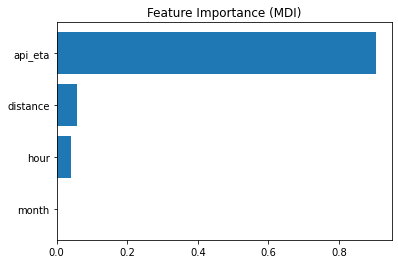

In [ ]:
print("The initial error of API ETA on test set: {:.6f}".format(mean_squared_error(y_test, x_test[:,0]) ))
print("The initial error of API ETA on test set: {:.6f}".format(mean_absolute_error(y_test, x_test[:,0]) ))

params = {'n_estimators': 100,
          'max_depth': 3,
           'min_samples_leaf': 1,
          'learning_rate': 0.1,
          'loss': 'ls'} # 'squared_error'와 같음


reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(x_train, y_train)

mse = mean_squared_error(y_test, reg.predict(x_test))
print("(기본 파라미터)The mean squared error (MSE) on test set: {:.6f}".format(mse))


mae = mean_absolute_error(y_test, reg.predict(x_test))
print("(기본 파라미터)The mean absolute error (MAE) on test set: {:.6f}".format(mae))





# params = {'n_estimators': n_estimators_mse,
#           'max_depth': max_depth_mse,
#           'min_samples_leaf': max_min_samples_leaf_mse,
#           'min_samples_split': min_samples_split_mse,
#           'learning_rate': learning_rate_mse,
#           'loss': best_loss} # 'squared_error'와 같음
# reg = ensemble.GradientBoostingRegressor(**params)
# reg.fit(x_train, y_train)
# mse = mean_squared_error(y_test, reg.predict(x_test))
# # mae = mean_absolute_error(y_test, reg.predict(x_test))
# print("The mean squared error (MSE) on test set: {:.6f}".format(mse))
# #print("The mean absolute error (MAE) on test set: {:.6f}".format(mae))

# params = {'n_estimators': n_estimators_mae,
#           'max_depth': max_depth_mae,
#           'min_samples_leaf': max_min_samples_leaf_mae,
#           'min_samples_split': min_samples_split_mae,
#           'learning_rate': learning_rate_mae,
#           'loss': best_loss} # 'squared_error'와 같음
# reg = ensemble.GradientBoostingRegressor(**params)
# reg.fit(x_train, y_train)
# # mse = mean_squared_error(y_test, reg.predict(x_test))
# mae = mean_absolute_error(y_test, reg.predict(x_test))
# #print("The mean squared error (MSE) on test set: {:.6f}".format(mse))
# print("The mean absolute error (MAE) on test set: {:.6f}".format(mae))

# test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
# # 학습의 수가 적지 않았느지 확인하기 위해  reg.staged_predict 사용
# #횟수별로 체크!
# for i, y_pred in enumerate(reg.staged_predict(x_test)):
#     test_score[i] = reg.loss_(y_test, y_pred)

# fig = plt.figure(figsize=(6, 6))
# plt.subplot(1, 1, 1)
# plt.title('Deviance')
# plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
#          label='Training Set Deviance')
# plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
#          label='Test Set Deviance')
# plt.legend(loc='upper right')
# plt.xlabel('Boosting Iterations')
# plt.ylabel('Deviance')
# fig.tight_layout()
# plt.show()

# feature_importance = reg.feature_importances_
# sorted_idx = np.argsort(feature_importance)
# pos = np.arange(sorted_idx.shape[0]) + .5
# plt.figure()
# plt.barh(pos, feature_importance[sorted_idx], align='center')
# plt.yticks(pos, np.array(eta_features)[sorted_idx])
# plt.title('Feature Importance (MDI)')
# plt.show()

params = {'n_estimators': 200,
          'max_depth': 2,
          'min_samples_leaf': 20,
          'min_samples_split': 14,
          'learning_rate': 0.05,
          'loss': 'ls'} # 'squared_error'와 같음
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(x_train, y_train)
mse = mean_squared_error(y_test, reg.predict(x_test))
# mae = mean_absolute_error(y_test, reg.predict(x_test))
print("The mean squared error (MSE) on test set: {:.6f}".format(mse))
#print("The mean absolute error (MAE) on test set: {:.6f}".format(mae))

feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure()
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(eta_features)[sorted_idx])
plt.title('Feature Importance (MDI)')
plt.show()

In [ ]:
# 정리
# 최상치만 했을때 오히려  mse는 더 커지는 현상이 발생!
# 즉 파라미터값들의 조합이 엄청 중요하다